### <h1 style="color:;font-family:cambria;font-size:43px;"   align=center  >Credit Card Fraud Detection</h1>
#  
## Credit Card Fraud Detection Project

### Project Description
This project aims to develop a machine learning model to detect credit card fraud using the Random Forest Classifier algorithm. The model is trained on a preprocessed dataset containing credit card transactions, with the goal of accurately identifying fraudulent transactions.

### Key Components
1. **Data Preprocessing**:
   - Attribute selection: Identifying the most relevant 9 attributes from the original dataset of 122 attributes.
   - Data splitting: Dividing the dataset into training and testing sets to evaluate the model's performance.

2. **Random Forest Classifier**:
   - Algorithm selection: Choosing the Random Forest Classifier as the machine learning algorithm for credit card fraud detection.
   - Hyperparameter tuning: Setting the number of decision trees (n_estimators) to 30 for optimal performance.
   - Model training: Fitting the Random Forest Classifier to the training data to learn patterns and make accurate predictions.

In [1]:
import pandas as pd
data=pd.read_csv('application_data.csv')

In [2]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
data.size

37516342

In [6]:
data.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [7]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
# Count the number of null values in each column
null_column = data.isnull().sum()

# Display the total number of columns and the count of null values in each column
total_columns = len(data.columns)
print(f'Total number of columns: {total_columns}\n')

for column, null_count in null_column.items():
    print(f'{column} -- {null_count} ')

Total number of columns: 122

SK_ID_CURR -- 0 
TARGET -- 0 
NAME_CONTRACT_TYPE -- 0 
CODE_GENDER -- 0 
FLAG_OWN_CAR -- 0 
FLAG_OWN_REALTY -- 0 
CNT_CHILDREN -- 0 
AMT_INCOME_TOTAL -- 0 
AMT_CREDIT -- 0 
AMT_ANNUITY -- 12 
AMT_GOODS_PRICE -- 278 
NAME_TYPE_SUITE -- 1292 
NAME_INCOME_TYPE -- 0 
NAME_EDUCATION_TYPE -- 0 
NAME_FAMILY_STATUS -- 0 
NAME_HOUSING_TYPE -- 0 
REGION_POPULATION_RELATIVE -- 0 
DAYS_BIRTH -- 0 
DAYS_EMPLOYED -- 0 
DAYS_REGISTRATION -- 0 
DAYS_ID_PUBLISH -- 0 
OWN_CAR_AGE -- 202929 
FLAG_MOBIL -- 0 
FLAG_EMP_PHONE -- 0 
FLAG_WORK_PHONE -- 0 
FLAG_CONT_MOBILE -- 0 
FLAG_PHONE -- 0 
FLAG_EMAIL -- 0 
OCCUPATION_TYPE -- 96391 
CNT_FAM_MEMBERS -- 2 
REGION_RATING_CLIENT -- 0 
REGION_RATING_CLIENT_W_CITY -- 0 
WEEKDAY_APPR_PROCESS_START -- 0 
HOUR_APPR_PROCESS_START -- 0 
REG_REGION_NOT_LIVE_REGION -- 0 
REG_REGION_NOT_WORK_REGION -- 0 
LIVE_REGION_NOT_WORK_REGION -- 0 
REG_CITY_NOT_LIVE_CITY -- 0 
REG_CITY_NOT_WORK_CITY -- 0 
LIVE_CITY_NOT_WORK_CITY -- 0 
ORGANIZATION_TY

* Here we found out that there are a total of 122 attributes and a lot of them are have more than 500 null values in them .
* If the null values are higher in the dataset then the model accuracy will be decreased and also if the attributes containing more null values are important then we cant lose them and also model cant predict correctly .
* So, we need to select the attributes which are mostly used to identify a fraud and here we chose a total of 7 attributes with the target attribute saying that if it is 0 then no fraud and if it is 1 then that row contains fraud persons data 

In [12]:
# List of columns to keep
cols_to_keep = [ 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

# Drop all columns except the specified ones
data = data[cols_to_keep]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TARGET                   307511 non-null  int64  
 1   AMT_INCOME_TOTAL         307511 non-null  float64
 2   AMT_CREDIT               307511 non-null  float64
 3   AMT_ANNUITY              307499 non-null  float64
 4   AMT_GOODS_PRICE          307233 non-null  float64
 5   NAME_INCOME_TYPE         307511 non-null  object 
 6   HOUR_APPR_PROCESS_START  307511 non-null  int64  
 7   ORGANIZATION_TYPE        307511 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 18.8+ MB


In [14]:
print(data.isnull().sum())

TARGET                       0
AMT_INCOME_TOTAL             0
AMT_CREDIT                   0
AMT_ANNUITY                 12
AMT_GOODS_PRICE            278
NAME_INCOME_TYPE             0
HOUR_APPR_PROCESS_START      0
ORGANIZATION_TYPE            0
dtype: int64


As we got some null values still they can be neglected as we have more data(i.e 307511 > 278 and 12 ), But to make better outcome we need to either fill those or drop those and here we fill them with mode and median.

In [15]:
# Separate columns by data type
object_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(exclude=['object']).columns

# Fill null values with mode for object type columns and median for numeric columns
for col in object_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

for col in numeric_columns:
    data[col].fillna(data[col].median(), inplace=True)

In [16]:
data

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,202500.0,406597.5,24700.5,351000.0,Working,10,Business Entity Type 3
1,0,270000.0,1293502.5,35698.5,1129500.0,State servant,11,School
2,0,67500.0,135000.0,6750.0,135000.0,Working,9,Government
3,0,135000.0,312682.5,29686.5,297000.0,Working,17,Business Entity Type 3
4,0,121500.0,513000.0,21865.5,513000.0,Working,11,Religion
...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,Working,15,Services
307507,0,72000.0,269550.0,12001.5,225000.0,Pensioner,8,XNA
307508,0,153000.0,677664.0,29979.0,585000.0,Working,9,School
307509,1,171000.0,370107.0,20205.0,319500.0,Commercial associate,9,Business Entity Type 1


In [17]:
data.isnull().sum()

TARGET                     0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY                0
AMT_GOODS_PRICE            0
NAME_INCOME_TYPE           0
HOUR_APPR_PROCESS_START    0
ORGANIZATION_TYPE          0
dtype: int64

In [18]:
# finding numerical data and categorical data in dataset
numerical= data.drop(['TARGET'], axis=1).select_dtypes('number').columns

categorical = data.select_dtypes('object').columns

print(f'Numerical Columns:  {data[numerical].columns}')
print('\n')
print(f'Categorical Columns: {data[categorical].columns}')

Numerical Columns:  Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')


Categorical Columns: Index(['NAME_INCOME_TYPE', 'ORGANIZATION_TYPE'], dtype='object')


We got 2 Categorical columns which have the strings in it . so we need to replace those strings with the numerical values . 

In [49]:

from sklearn import preprocessing

# Create a label encoder for 'NAME_INCOME_TYPE' and 'ORGANIZATION_TYPE'
label_encoder = preprocessing.LabelEncoder()

# Fit and transform 'NAME_INCOME_TYPE' and 'ORGANIZATION_TYPE' to numerical values
data['NAME_INCOME_TYPE'] = label_encoder.fit_transform(data['NAME_INCOME_TYPE'])
data['ORGANIZATION_TYPE'] = label_encoder.fit_transform(data['ORGANIZATION_TYPE'])

# Create dictionaries to map numerical values back to original categorical values
income_type_mapping = dict(zip(label_encoder_income_type.transform(label_encoder_income_type.classes_), label_encoder_income_type.classes_))
org_type_mapping = dict(zip(label_encoder_org_type.transform(label_encoder_org_type.classes_), label_encoder_org_type.classes_))

# Print the dictionaries
print("Income Type Mapping:")
print(income_type_mapping)
print("\nOrganization Type Mapping:")
print(org_type_mapping)

Income Type Mapping:
{0: 'Businessman', 1: 'Commercial associate', 2: 'Maternity leave', 3: 'Pensioner', 4: 'State servant', 5: 'Student', 6: 'Unemployed', 7: 'Working'}

Organization Type Mapping:
{0: 'Advertising', 1: 'Agriculture', 2: 'Bank', 3: 'Business Entity Type 1', 4: 'Business Entity Type 2', 5: 'Business Entity Type 3', 6: 'Cleaning', 7: 'Construction', 8: 'Culture', 9: 'Electricity', 10: 'Emergency', 11: 'Government', 12: 'Hotel', 13: 'Housing', 14: 'Industry: type 1', 15: 'Industry: type 10', 16: 'Industry: type 11', 17: 'Industry: type 12', 18: 'Industry: type 13', 19: 'Industry: type 2', 20: 'Industry: type 3', 21: 'Industry: type 4', 22: 'Industry: type 5', 23: 'Industry: type 6', 24: 'Industry: type 7', 25: 'Industry: type 8', 26: 'Industry: type 9', 27: 'Insurance', 28: 'Kindergarten', 29: 'Legal Services', 30: 'Medicine', 31: 'Military', 32: 'Mobile', 33: 'Other', 34: 'Police', 35: 'Postal', 36: 'Realtor', 37: 'Religion', 38: 'Restaurant', 39: 'School', 40: 'Security

Above mapping shows 2 dictionaries for those 2 attributes and it shows the replaced numbers and their values 

In [20]:
for col in data.columns:
    if data[col].dtypes != object:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        llp = q1-1.5*IQR
        ulp = q3+1.5*IQR
        print('column name',col)
        print('mean:',data[col].mean())
        print('mode:',data[col].mode()[0])
        print('median:',data[col].median())
        print('skewness:',data[col].skew())
        print('kurtosis:',data[col].kurtosis())
        print('null_value count:',data[col].isnull().sum())
        print('\n')

column name TARGET
mean: 0.08072881945686496
mode: 0
median: 0.0
skewness: 3.0781586659196685
kurtosis: 7.475109389392569
null_value count: 0


column name AMT_INCOME_TOTAL
mean: 168797.9192969845
mode: 135000.0
median: 147150.0
skewness: 391.5596541041876
kurtosis: 191786.55438080415
null_value count: 0


column name AMT_CREDIT
mean: 599025.9997057016
mode: 450000.0
median: 513531.0
skewness: 1.2347784971349398
kurtosis: 1.9340413008324937
null_value count: 0


column name AMT_ANNUITY
mean: 27108.48784108536
mode: 9000.0
median: 24903.0
skewness: 1.5798237246955467
kurtosis: 7.7077559537369025
null_value count: 0


column name AMT_GOODS_PRICE
mean: 538316.2943667056
mode: 450000.0
median: 450000.0
skewness: 1.350142549635089
kurtosis: 2.4374401731304225
null_value count: 0


column name NAME_INCOME_TYPE
mean: 4.670288217332063
mode: 7
median: 7.0
skewness: -0.3550757581538051
kurtosis: -1.5948494738474766
null_value count: 0


column name HOUR_APPR_PROCESS_START
mean: 12.0634188695688

These measures provide insights into the central tendency, dispersion, shape, and presence of outliers in the numerical data. The code aids in data exploration and understanding column characteristics, helping identify data completeness and potential data quality issues.

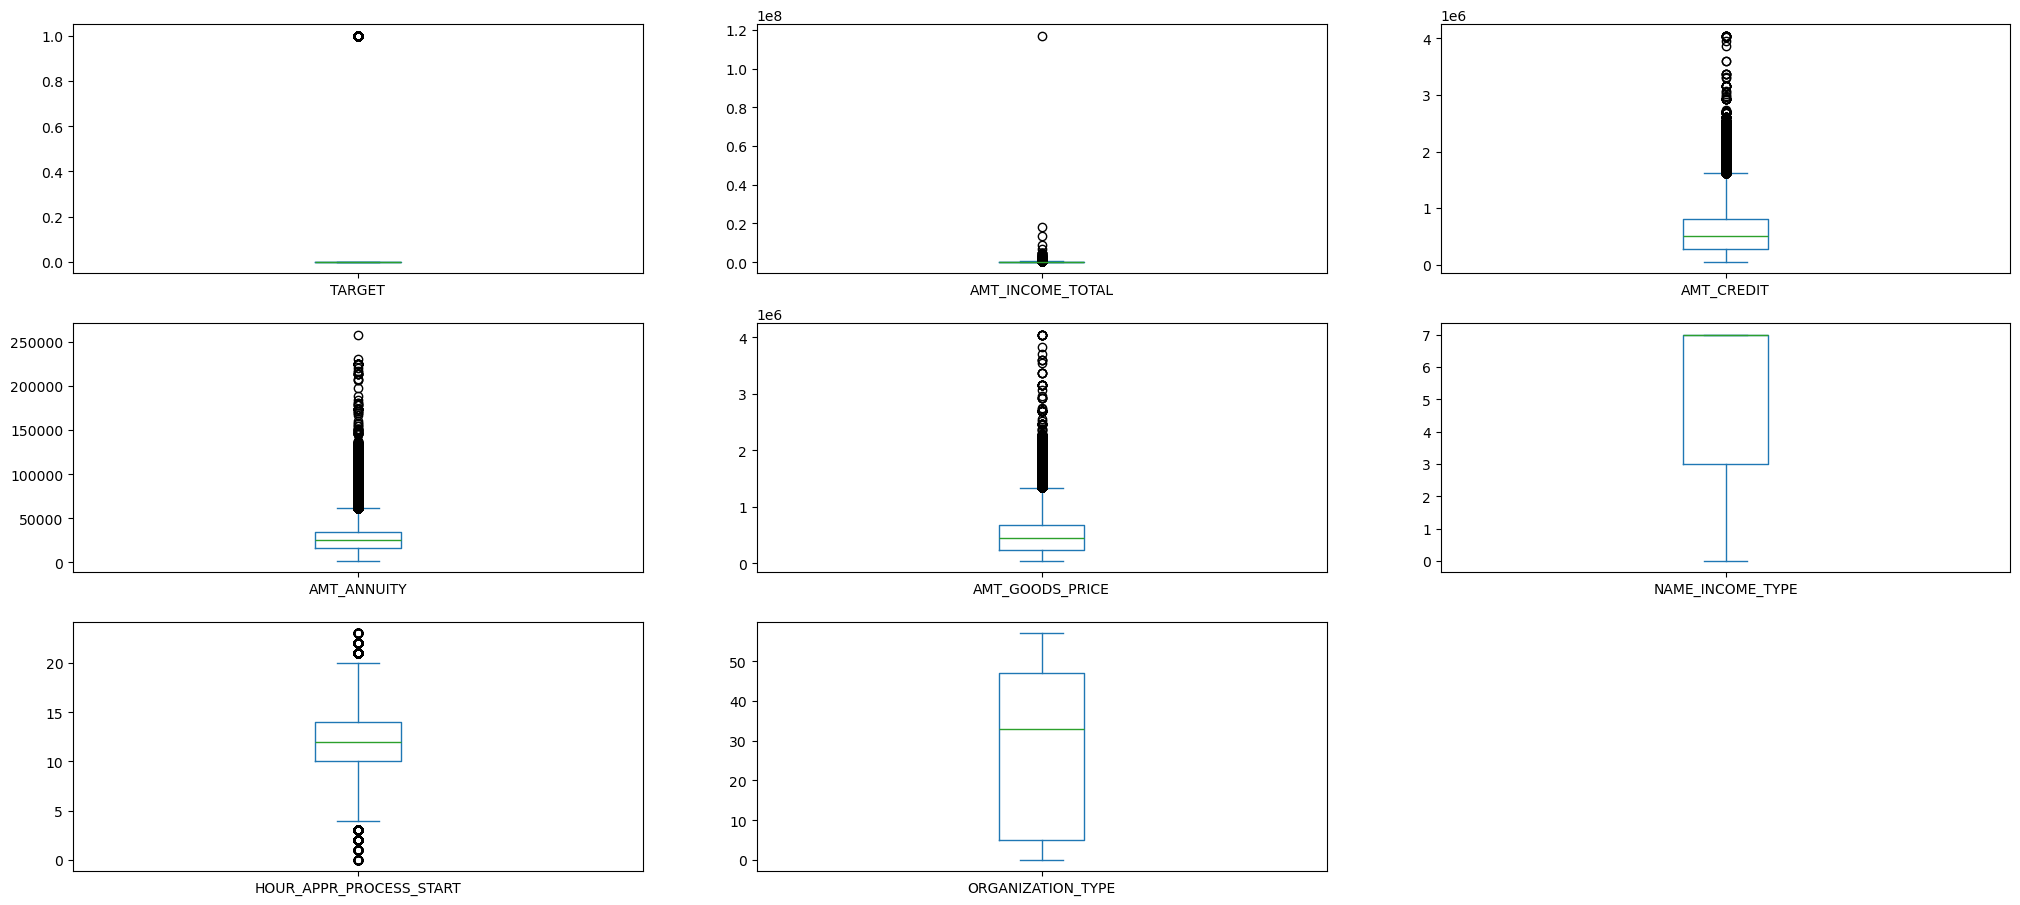

In [50]:
import matplotlib.pyplot as plt

#checking outliers
#Outlier Search: This helps you to get some insights about the outliers in the data.
data.plot(kind='box', layout=(3,3),subplots=1,figsize=(25,11))
plt.show()

In [51]:
cor = data.corr()
cor

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
TARGET,1.000000,-0.003982,-0.030369,-0.012815,-0.039623,0.046829,-0.024166,-0.030765
AMT_INCOME_TOTAL,-0.003982,1.000000,0.156870,0.191657,0.159632,-0.044451,0.036459,-0.058272
AMT_CREDIT,-0.030369,0.156870,1.000000,0.770127,0.986734,-0.071794,0.052738,-0.052620
AMT_ANNUITY,-0.012815,0.191657,0.770127,1.000000,0.774837,-0.073018,0.052265,-0.077215
AMT_GOODS_PRICE,-0.039623,0.159632,0.986734,0.774837,1.000000,-0.072458,0.062269,-0.052060
NAME_INCOME_TYPE,0.046829,-0.044451,-0.071794,-0.073018,-0.072458,1.000000,-0.029674,-0.176226
HOUR_APPR_PROCESS_START,-0.024166,0.036459,0.052738,0.052265,0.062269,-0.029674,1.000000,-0.083595
ORGANIZATION_TYPE,-0.030765,-0.058272,-0.052620,-0.077215,-0.052060,-0.176226,-0.083595,1.000000


This correlation matrix helps in understanding the strength and direction of relationships between different variables in the dataset.
we cn now proceed to build our model

In [52]:
data

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,202500.0,406597.5,24700.5,351000.0,7,10,5
1,0,270000.0,1293502.5,35698.5,1129500.0,4,11,39
2,0,67500.0,135000.0,6750.0,135000.0,7,9,11
3,0,135000.0,312682.5,29686.5,297000.0,7,17,5
4,0,121500.0,513000.0,21865.5,513000.0,7,11,37
...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,7,15,43
307507,0,72000.0,269550.0,12001.5,225000.0,3,8,57
307508,0,153000.0,677664.0,29979.0,585000.0,7,9,39
307509,1,171000.0,370107.0,20205.0,319500.0,1,9,3


In [54]:
X = data.drop("TARGET",axis=1)
y = data.TARGET

In [26]:
X.shape

(307511, 7)

In [27]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

X_train.shape,X_test.shape

((215257, 7), (92254, 7))

In [28]:
y_train

208983    0
71687     0
301340    0
216927    0
109091    0
         ..
21440     0
117583    0
73349     0
267336    0
128037    0
Name: TARGET, Length: 215257, dtype: int64

In [29]:
X_train.shape

(215257, 7)

In [30]:
X_test.shape

(92254, 7)

In [31]:
# Applying random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_Classifier = RandomForestClassifier(n_estimators = 30, random_state = 0)
rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=0)

1. **Random Forest Classifier Initialization**:
   - A Random Forest Classifier is instantiated with 30 decision trees (`n_estimators = 30`) and a random state of 0 for reproducibility,Setting `n_estimators = 30` means the model will consist of 30 decision trees. 
   - Increasing `n_estimators` can enhance model accuracy by leveraging the wisdom of multiple trees, leading to more robust predictions through aggregation of individual tree predictions.
   - More trees can improve the model's ability to generalize and reduce variance, ultimately contributing to higher accuracy in the predictions.

2. **Model Training**:
   - The Random Forest Classifier (`rf_Classifier`) is trained on the training data (`X_train` and `y_train`) using the `fit()` method.
   - The model learns patterns in the features (`X_train`) to predict the target variable (`y_train`) based on the ensemble of decision trees.

By fitting the Random Forest Classifier to the training data, the model learns to make predictions based on the collective decisions of multiple trees, providing a robust and accurate classification approach for the given dataset.

In [32]:
y_pred = rf_Classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import  confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[84150   637]
 [ 7343   124]]


0.9134996856504867

In [34]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     84787
           1       0.16      0.02      0.03      7467

    accuracy                           0.91     92254
   macro avg       0.54      0.50      0.49     92254
weighted avg       0.86      0.91      0.88     92254



In [35]:
data.tail()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
307506,0,157500.0,254700.0,27558.0,225000.0,7,15,43
307507,0,72000.0,269550.0,12001.5,225000.0,3,8,57
307508,0,153000.0,677664.0,29979.0,585000.0,7,9,39
307509,1,171000.0,370107.0,20205.0,319500.0,1,9,3
307510,0,157500.0,675000.0,49117.5,675000.0,1,20,5


In [44]:
import numpy as np
# Adjust the input data to include all 8 features expected by the model
new_data = np.array([[171002.0, 372107.0, 20205.0, 319500.0, 1, 9, 3]])  # Add a placeholder for the missing feature

# Predict using the model with the adjusted input data
result = rf_Classifier.predict(new_data)
result[0]

C:\Users\eswar\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

In [55]:
# model is trained on these types of income types and oganization types
# so model cant precit other types than these , so to test the model use these 
print("Income Type Mapping:")
for key, value in income_type_mapping.items():
    print(f"{key}: {value}")

print("\nOrganization Type Mapping:")
for key, value in org_type_mapping.items():
    print(f"{key}: {value}")

Income Type Mapping:
0: Businessman
1: Commercial associate
2: Maternity leave
3: Pensioner
4: State servant
5: Student
6: Unemployed
7: Working

Organization Type Mapping:
0: Advertising
1: Agriculture
2: Bank
3: Business Entity Type 1
4: Business Entity Type 2
5: Business Entity Type 3
6: Cleaning
7: Construction
8: Culture
9: Electricity
10: Emergency
11: Government
12: Hotel
13: Housing
14: Industry: type 1
15: Industry: type 10
16: Industry: type 11
17: Industry: type 12
18: Industry: type 13
19: Industry: type 2
20: Industry: type 3
21: Industry: type 4
22: Industry: type 5
23: Industry: type 6
24: Industry: type 7
25: Industry: type 8
26: Industry: type 9
27: Insurance
28: Kindergarten
29: Legal Services
30: Medicine
31: Military
32: Mobile
33: Other
34: Police
35: Postal
36: Realtor
37: Religion
38: Restaurant
39: School
40: Security
41: Security Ministries
42: Self-employed
43: Services
44: Telecom
45: Trade: type 1
46: Trade: type 2
47: Trade: type 3
48: Trade: type 4
49: Tra

In [47]:
amt_income_total = float(input("Enter AMT_INCOME_TOTAL: "))
amt_credit = float(input("Enter AMT_CREDIT: "))
amt_annuity = float(input("Enter AMT_ANNUITY: "))
amt_goods_price = float(input("Enter AMT_GOODS_PRICE: "))
hour_appr_process_start = int(input("Enter HOUR_APPR_PROCESS_START: "))

name_income_type = input("Enter NAME_INCOME_TYPE: ")
organization_type = input("Enter ORGANIZATION_TYPE: ")

# Find the numerical values for NAME_INCOME_TYPE and ORGANIZATION_TYPE using the mapping dictionaries
name_income_type_num = income_type_mapping.get(name_income_type, list(income_type_mapping.keys())[0])
organization_type_num = org_type_mapping.get(organization_type, list(org_type_mapping.keys())[0])

# Create a DataFrame with the input data
input_data = pd.DataFrame({
    'AMT_INCOME_TOTAL': [amt_income_total],
    'AMT_CREDIT': [amt_credit],
    'AMT_ANNUITY': [amt_annuity],
    'AMT_GOODS_PRICE': [amt_goods_price],
    'NAME_INCOME_TYPE': [name_income_type_num],
    'HOUR_APPR_PROCESS_START': [hour_appr_process_start],
    'ORGANIZATION_TYPE': [organization_type_num]
})

# Predict using the model
prediction = rf_Classifier.predict(input_data)

# Check if the prediction indicates fraud or not
if prediction[0] == 1:
    print("The model predicts fraud.")
else:
    print("The model does not predict fraud.")

Enter AMT_INCOME_TOTAL: 159000
Enter AMT_CREDIT: 1380000
Enter AMT_ANNUITY: 13249
Enter AMT_GOODS_PRICE: 123443
Enter HOUR_APPR_PROCESS_START: 1212983
Enter NAME_INCOME_TYPE: nothing
Enter ORGANIZATION_TYPE: nothing
The model does not predict fraud.
